# W12 - Exercise

use the dataset __healthcare_dataset__ for this exercise

Column details: <br>
- **Name**: This column represents the name of the patient associated with the healthcare record. <br>
- **Age**: The age of the patient at the time of admission, expressed in years. <br>
- **Gender**: Indicates the gender of the patient, either "Male" or "Female."<br>
- **Blood** Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).<br>
- **Medical** Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.<br>
- **Date of Admission**: The date on which the patient was admitted to the healthcare facility.<br>
- **Doctor**: The name of the doctor responsible for the patient's care during their admission.<br>
- **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.<br>
- **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."<br>
- **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.<br>
- **Room Number**: The room number where the patient was accommodated during their admission.<br>
- **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.<br>
- **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.<br>
- **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."<br>
- **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.<br>

This exercise is applicable to multiple machine learning algorithms. Create EDA to visualize data and results and explore as far as you can.
Task:
1. Data Cleaning, Transformation
2. Visualization (EDA)
3. Use at least one machine learning techniques (Regression, Classification, Clustering)
4. Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)

This exercise is to test your willingness to explore, critical thinking and the knowledge when to use what algorithms to achieve a purpose. 

In [2]:
import pandas as pd
file = 'Documents/healthcare_dataset.csv'
df=pd.read_csv(file)
df.head(5)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [6]:
null = df.isna().sum()
print(null)

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Blood Type'] = label_encoder.fit_transform(df['Blood Type'])
df['Admission Type'] = label_encoder.fit_transform(df['Admission Type'])


print(df)

                      Name  Age  Gender  Blood Type Medical Condition  \
0          Tiffany Ramirez   81       0           7          Diabetes   
1              Ruben Burns   35       1           6            Asthma   
2                Chad Byrd   61       1           5           Obesity   
3        Antonio Frederick   49       1           5            Asthma   
4      Mrs. Brandy Flowers   51       1           7         Arthritis   
...                    ...  ...     ...         ...               ...   
9995            James Hood   83       1           0           Obesity   
9996       Stephanie Evans   47       0           2         Arthritis   
9997  Christopher Martinez   54       1           5         Arthritis   
9998           Amanda Duke   84       1           0         Arthritis   
9999             Eric King   20       1           5         Arthritis   

     Date of Admission             Doctor                   Hospital  \
0           2022-11-17     Patrick Parker          

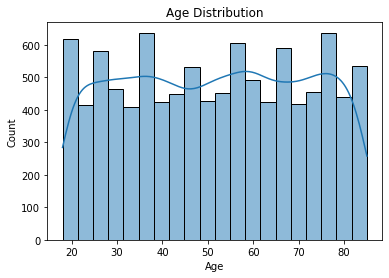

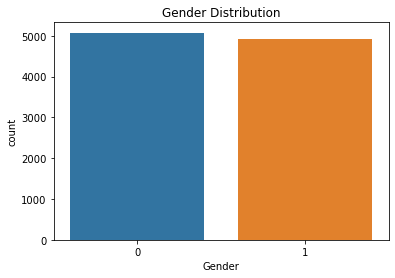

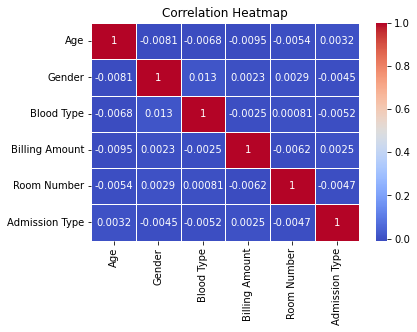

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[['Gender', 'Age', 'Blood Type', 'Admission Type']]
y = df['Medical Condition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.17

Confusion Matrix:
[[56 48 40 49 69 57]
 [62 55 63 46 52 54]
 [74 66 61 61 61 40]
 [50 53 39 46 53 62]
 [45 47 71 67 61 45]
 [57 56 56 52 69 57]]

Classification Report:
              precision    recall  f1-score   support

   Arthritis       0.16      0.18      0.17       319
      Asthma       0.17      0.17      0.17       332
      Cancer       0.18      0.17      0.18       363
    Diabetes       0.14      0.15      0.15       303
Hypertension       0.17      0.18      0.17       336
     Obesity       0.18      0.16      0.17       347

    accuracy                           0.17      2000
   macro avg       0.17      0.17      0.17      2000
weighted avg       0.17      0.17      0.17      2000



In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Gender', 'Age', 'Blood Type', 'Admission Type']]
y = df['Billing Amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


ValueError: could not convert string to float: 'Diabetes'

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


X = df[['Gender', 'Age', 'Blood Type', 'Admission Type']]
y = df['Medical Condition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.17

Confusion Matrix:
[[ 89  58  46  47  50  29]
 [ 84  65  59  44  42  38]
 [111  66  54  50  51  31]
 [ 86  46  46  36  46  43]
 [ 95  73  46  54  38  30]
 [103  65  46  46  39  48]]

Classification Report:
              precision    recall  f1-score   support

   Arthritis       0.16      0.28      0.20       319
      Asthma       0.17      0.20      0.18       332
      Cancer       0.18      0.15      0.16       363
    Diabetes       0.13      0.12      0.12       303
Hypertension       0.14      0.11      0.13       336
     Obesity       0.22      0.14      0.17       347

    accuracy                           0.17      2000
   macro avg       0.17      0.17      0.16      2000
weighted avg       0.17      0.17      0.16      2000



In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[['Gender', 'Age', 'Blood Type', 'Admission Type']]
y = df['Medical Condition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred = logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.15

Confusion Matrix:
[[ 28  95  80   3 113   0]
 [ 20  82  97   2 131   0]
 [ 29 118  78   3 135   0]
 [ 16  92  76   2 117   0]
 [ 30  99  85   2 120   0]
 [ 38  98  84   3 124   0]]

Classification Report:
              precision    recall  f1-score   support

   Arthritis       0.17      0.09      0.12       319
      Asthma       0.14      0.25      0.18       332
      Cancer       0.16      0.21      0.18       363
    Diabetes       0.13      0.01      0.01       303
Hypertension       0.16      0.36      0.22       336
     Obesity       0.00      0.00      0.00       347

    accuracy                           0.15      2000
   macro avg       0.13      0.15      0.12      2000
weighted avg       0.13      0.15      0.12      2000



C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vince\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vince\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l